 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns

# Get the file path for the csv file
whale_returns_path = Path("Resources/whale_returns.csv")

# Read the csv file to a dataframe
whale_returns_df = pd.read_csv(whale_returns_path)

# Convert the date column to a DateTimeIndex
whale_returns_df.set_index(pd.to_datetime(whale_returns_df["Date"], infer_datetime_format = True), inplace = True)
whale_returns_df.drop(columns = ["Date"], inplace = True)

# Sort the dates in ascending order
whale_returns_df.sort_index(ascending = True, inplace = True)

# Show the first few rows of the dataframe
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df.dropna(inplace = True)

# Show the first few rows of the dataframe
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns

# Get the file path for the csv file
algo_returns_path = Path("Resources/algo_returns.csv")

# Read the csv file to a dataframe
algo_returns_df = pd.read_csv(algo_returns_path)

# Convert the date column to a DateTimeIndex
algo_returns_df.set_index(pd.to_datetime(algo_returns_df["Date"], infer_datetime_format = True), inplace = True)
algo_returns_df.drop(columns = ["Date"], inplace = True)

# Sort the dates in ascending order
algo_returns_df.sort_index(ascending = True, inplace = True)

# Show the first few rows of the dataframe
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace = True)

# Show the first few rows of the dataframe
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices

# Get the file path for the csv file
sp_tsx_history_path = Path("Resources/sp_tsx_history.csv")

# Read the csv file to a dataframe
sp_tsx_history_df = pd.read_csv(sp_tsx_history_path)

# Convert the date column to a DateTimeIndex
sp_tsx_history_df.set_index(pd.to_datetime(sp_tsx_history_df["Date"], infer_datetime_format = True), inplace = True)
sp_tsx_history_df.drop(columns = ["Date"], inplace = True)

# Sort the dates in ascending order
sp_tsx_history_df.sort_index(ascending = True, inplace = True)

# Show the first few rows of the dataframe
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types

# Remove the dollar sign and comma from close prices
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.strip("$")
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(",", "")

# Convert the close prices to numeric type
sp_tsx_history_df["Close"] = pd.to_numeric(sp_tsx_history_df["Close"])

# Show the first few rows of the dataframe
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [11]:
# Calculate Daily Returns
sp_tsx_returns_df = sp_tsx_history_df.pct_change()

# Show the first few rows of the dataframe
sp_tsx_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [12]:
# Drop nulls
sp_tsx_returns_df.dropna(inplace = True)

# Show the first few rows of the dataframe
sp_tsx_returns_df.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns_df.columns = ["S&P TSX"]

# Show the first few rows of the dataframe
sp_tsx_returns_df.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into 
# a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp_tsx_returns_df], axis = "columns", join = "inner")

# Show the first few rows of the dataframe
combined_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns of All Portfolios and S&P TSX 60'}, xlabel='Date', ylabel='Daily Return'>

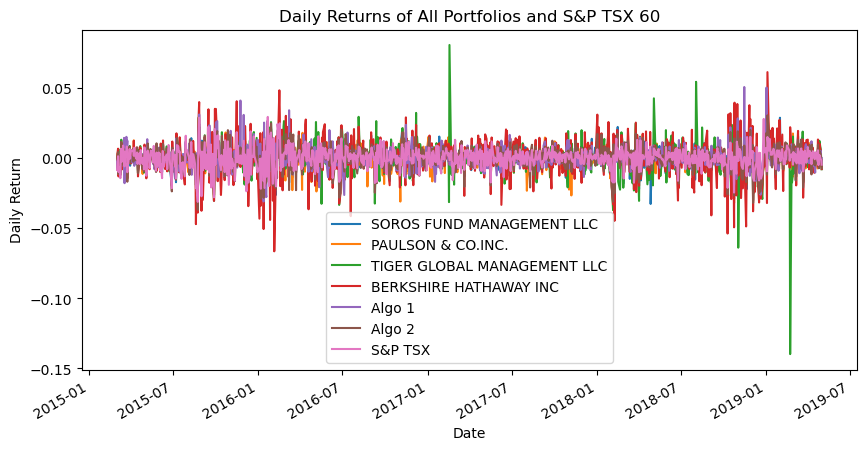

In [15]:
# Plot daily returns of all portfolios
combined_returns_df.plot(ylabel = "Daily Return", figsize = (10, 5), 
                         title = "Daily Returns of All Portfolios and S&P TSX 60")

#### Calculate and Plot cumulative returns.

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns_df = (1 + combined_returns_df).cumprod() - 1

# Show the first few rows of the dataframe
cumulative_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.011872
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.010544
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.020411
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.026832


<Axes: title={'center': 'Cumulative Returns of All Portfolios and S&P TSX 60'}, xlabel='Date', ylabel='Cumulative Return'>

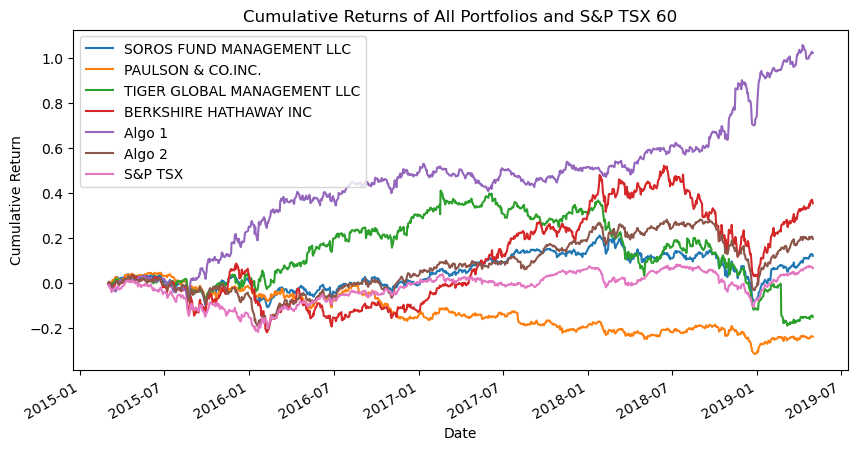

In [17]:
# Plot cumulative returns of all portfolios
cumulative_returns_df.plot(ylabel = "Cumulative Return", figsize = (10, 5), 
                           title = "Cumulative Returns of All Portfolios and S&P TSX 60")

It follows from the cumulative returns plot that all the portfolios *except* for the **TIGER GLOBAL MANAGEMENT LLC** and **PAULSON & CO.INC.** portfolios outperform the S&P TSX 60 to the most recent date.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: title={'center': 'Cumulative Returns of All Portfolios and S&P TSX 60'}, ylabel='Cumulative Return'>

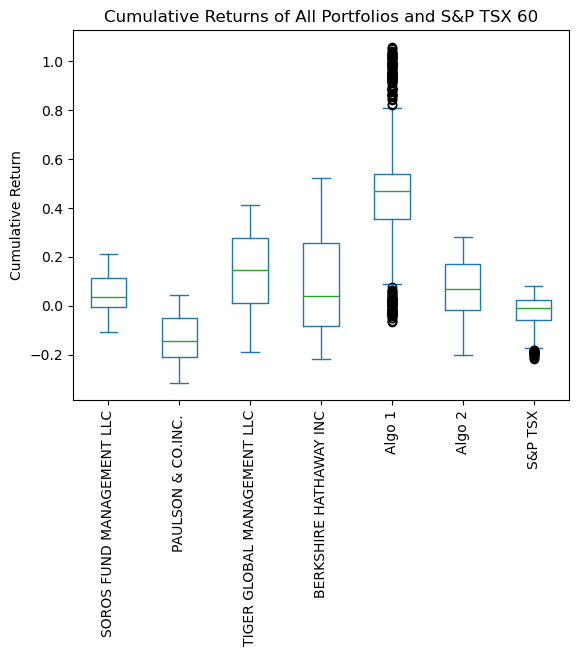

In [18]:
# Box plot to visually show risk
cumulative_returns_df.plot.box(ylabel = "Cumulative Return", rot = 90, 
                               title = "Cumulative Returns of All Portfolios and S&P TSX 60")

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
std_df = combined_returns_df.std()
std_df

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Determine which portfolios are riskier than the S&P TSX 60
std_df.sort_values(ascending = False, inplace = True)
std_df

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

It follows from the sorted standard deviations that all the portfolios *except* for the **PAULSON & CO.INC.** portfolio are riskier than the S&P TSX 60.

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
std_annualized_df = std_df * np.sqrt(252)
std_annualized_df

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX                        0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
window = 21
rolling_std_df = combined_returns_df.rolling(window).std()

# Drop nulls
rolling_std_df.dropna(inplace = True)

# Show the first few rows of the dataframe
rolling_std_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,0.006583
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.006404
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.006509
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.006596
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.006295


<Axes: title={'center': 'Rolling 21-Day Standard Deviation of All Portfolios and S&P TSX 60'}, xlabel='Date', ylabel='Rolling 21-Day Standard Deviation'>

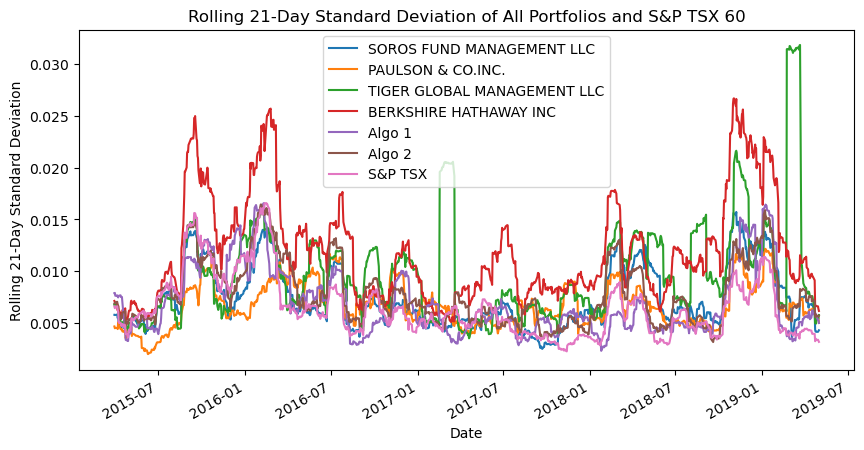

In [23]:
# Plot the rolling standard deviation
rolling_std_df.plot(ylabel = "Rolling 21-Day Standard Deviation", figsize = (10, 5), 
                    title = "Rolling 21-Day Standard Deviation of All Portfolios and S&P TSX 60")

### Calculate and plot the correlation

In [24]:
# Calculate the correlation
correlation_df = combined_returns_df.corr()

# Display the correlation matrix
correlation_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<Axes: >

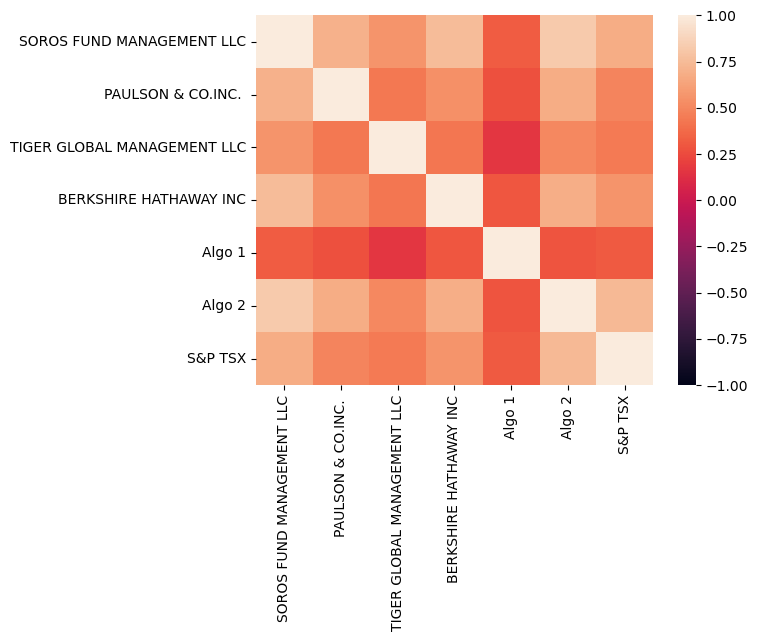

In [25]:
# Plot the correlation using the heatmap function
sns.heatmap(correlation_df, vmin=-1, vmax=1)

Based on the correlation table and heatmap, the portfolios that may mimick the S&P TSX 60 are the **Algorithmic 2** followed by the **SOROS FUND MANAGEMENT LLC** portfolios.

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

Consider the **Algorithmic 1** portfolio.

<Axes: title={'center': 'Rolling 60-Day Beta of the Algorithmic 1 Portfolio vs the S&P TSX 60'}, xlabel='Date', ylabel='Rolling 60-Day Beta'>

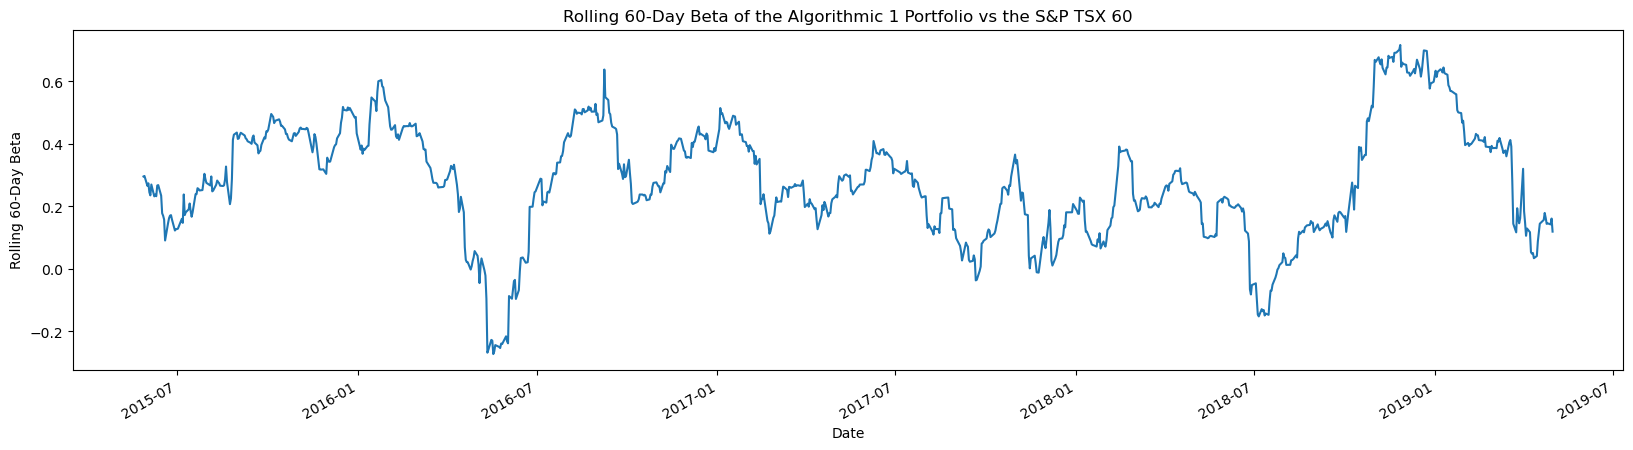

In [26]:
# Calculate and plot the 60-day rolling beta of the chosen portfolio and the S&P TSX 60
window = 60

# Calculate 60-day rolling covariance of daily returns of Algo 1 vs. S&P TSX
rolling_covariance = combined_returns_df['Algo 1'].rolling(window).cov(combined_returns_df['S&P TSX'])

# Calculate 60-day rolling variance of S&P TSX
rolling_variance = combined_returns_df['S&P TSX'].rolling(window).var()

# Computing 60-day rolling beta
rolling_beta = rolling_covariance / rolling_variance

# Plot 60-day rolling beta trend
rolling_beta.plot(ylabel = "Rolling 60-Day Beta", figsize = (20, 5), 
                  title='Rolling 60-Day Beta of the Algorithmic 1 Portfolio vs the S&P TSX 60')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [27]:
# Use `ewm` to calculate the rolling window
halflife = 21
ewm_std_df = combined_returns_df.ewm(halflife).std()

# Drop nulls
ewm_std_df.dropna(inplace = True)

# Show the first few rows of the dataframe
ewm_std_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002673,0.004953,0.002487,0.007001,0.004166,0.002658,0.004934
2015-03-06,0.005385,0.004610,0.004696,0.009429,0.003412,0.007217,0.005222
2015-03-09,0.004655,0.004462,0.005541,0.008074,0.002984,0.006320,0.004517
2015-03-10,0.005848,0.004713,0.006930,0.007837,0.002935,0.007352,0.005505


<Axes: title={'center': 'Exponentially Weighted Average Rolling 21-Day Standard Deviation of Portfolios and S&P TSX 60'}, xlabel='Date', ylabel='Exponentially Weighted Average Rolling Standard Deviation'>

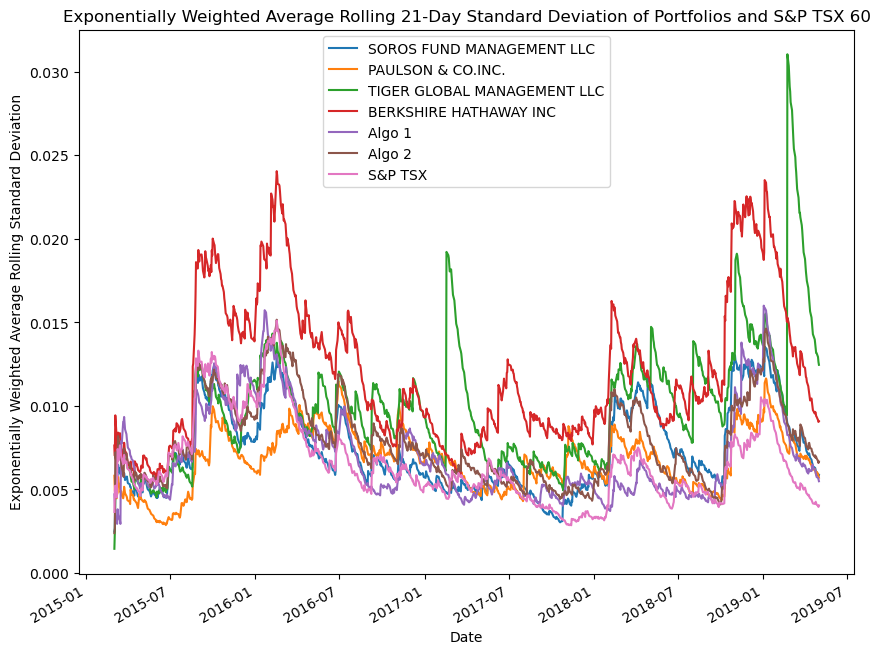

In [51]:
# Plot the 'ewm' rolling standard deviation
ewm_std_df.plot(ylabel = "Exponentially Weighted Average Rolling Standard Deviation", figsize = (10, 8), 
                title = "Exponentially Weighted Average Rolling 21-Day Standard Deviation of Portfolios and S&P TSX 60")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Calculate annualized Sharpe Ratios
sharpe_df = (combined_returns_df.mean() * 252) / (combined_returns_df.std() * np.sqrt(252))
sharpe_df

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}, ylabel='Annualized Sharpe Ratios'>

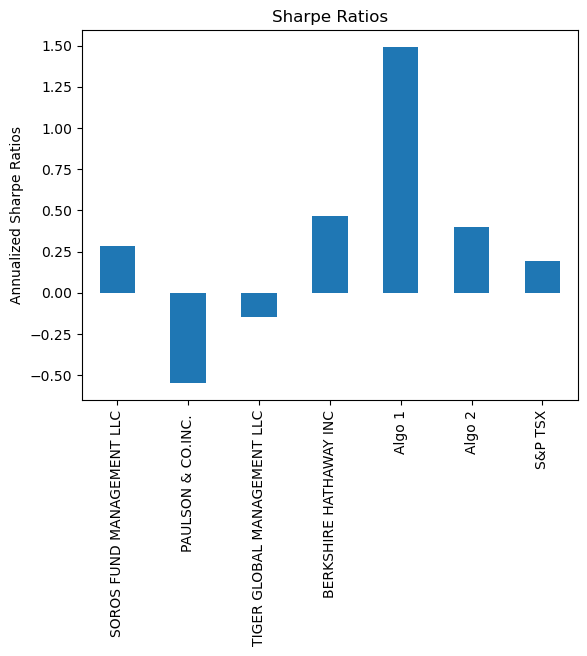

In [30]:
# Visualize the sharpe ratios as a bar plot
sharpe_df.plot(ylabel = "Annualized Sharpe Ratios", kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

It follows from the Sharpe Ratios bar plot that the **Algorithmic 1** portfolio outperform both the market and the whales portfolios, whereas the **Algorithmic 2** portfolio outperform all *except* the **BERKSHIRE HATHAWAY INC** portfolio.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Reading data from 1st stock

# Get the file path for the csv file
amd_historical_path = Path("Resources/amd_historical.csv")

# Read the csv file to a dataframe and set DateTimeIndex
amd_historical_df = pd.read_csv(amd_historical_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)

# Show the first few rows of the dataframe
amd_historical_df.head()

,Close
Date,
2018-01-02,10.98
2018-01-03,11.55
2018-01-04,12.12
2018-01-05,11.88
2018-01-08,12.28


In [32]:
# Reading data from 2nd stock

# Get the file path for the csv file
enb_historical_path = Path("Resources/enb_historical.csv")

# Read the csv file to a dataframe and set DateTimeIndex
enb_historical_df = pd.read_csv(enb_historical_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)

# Show the first few rows of the dataframe
enb_historical_df.head()

,Close
Date,
2018-01-02,40.14
2018-01-03,40.41
2018-01-04,40.77
2018-01-05,40.74
2018-01-08,40.73


In [33]:
# Reading data from 3rd stock

# Get the file path for the csv file
jnj_historical_path = Path("Resources/jnj_historical.csv")

# Read the csv file to a dataframe and set DateTimeIndex
jnj_historical_df = pd.read_csv(jnj_historical_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)

# Show the first few rows of the dataframe
jnj_historical_df.head()

,Close
Date,
2018-01-02,139.23
2018-01-03,140.56
2018-01-04,140.55
2018-01-05,141.71
2018-01-08,141.89


In [34]:
# Reading data from 4th stock

# Get the file path for the csv file
ko_historical_path = Path("Resources/ko_historical.csv")

# Read the csv file to a dataframe and set DateTimeIndex
ko_historical_df = pd.read_csv(ko_historical_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)

# Show the first few rows of the dataframe
ko_historical_df.head()

,Close
Date,
2018-01-02,45.54
2018-01-03,45.44
2018-01-04,46.08
2018-01-05,46.07
2018-01-08,46.00


In [35]:
# Combine all stocks in a single DataFrame
combined_historical_df = pd.concat([amd_historical_df, enb_historical_df, jnj_historical_df, ko_historical_df], 
                                   axis = "columns", join = "inner")

# Show the first few rows of the dataframe
combined_historical_df.head()

,Close,Close,Close,Close
Date,,,,
2018-01-02,10.98,40.14,139.23,45.54
2018-01-03,11.55,40.41,140.56,45.44
2018-01-04,12.12,40.77,140.55,46.08
2018-01-05,11.88,40.74,141.71,46.07
2018-01-08,12.28,40.73,141.89,46.00


In [36]:
# Sort the dates in ascending order
combined_historical_df.sort_index(ascending = True, inplace = True)

In [37]:
# Set column names
combined_historical_df.columns = ["AMD", "ENB", "JNJ", "KO"]

# Show the first few rows of the dataframe
combined_historical_df.head()

,AMD,ENB,JNJ,KO
Date,,,,
2018-01-02,10.98,40.14,139.23,45.54
2018-01-03,11.55,40.41,140.56,45.44
2018-01-04,12.12,40.77,140.55,46.08
2018-01-05,11.88,40.74,141.71,46.07
2018-01-08,12.28,40.73,141.89,46.00


In [38]:
# Calculate daily returns
custom_returns_df = combined_historical_df.pct_change()

# Drop NAs
custom_returns_df.dropna(inplace = True)

# Display sample data
custom_returns_df.head()

,AMD,ENB,JNJ,KO
Date,,,,
2018-01-03,0.051913,0.006726,0.009553,-0.002196
2018-01-04,0.049351,0.008909,-0.000071,0.014085
2018-01-05,-0.019802,-0.000736,0.008253,-0.000217
2018-01-08,0.033670,-0.000245,0.001270,-0.001519
2018-01-09,-0.037459,-0.012030,0.015857,0.005000


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [39]:
# Set weights
weights = [0.25, 0.25, 0.25, 0.25]

# Calculate portfolio return
portfolio_returns = custom_returns_df.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2018-01-03    0.016499
2018-01-04    0.018068
2018-01-05   -0.003125
2018-01-08    0.008294
2018-01-09   -0.007158
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [40]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolio_returns_df = pd.concat([combined_returns_df, portfolio_returns], axis = "columns", join = "inner")

# Set the column name
combined_portfolio_returns_df.columns = [*combined_portfolio_returns_df.columns[:-1], 'Custom']

# Show the first few rows of the dataframe
combined_portfolio_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.016499
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.018068
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003125
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.008294
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.007158


In [41]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolio_returns_df.dropna(inplace = True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [42]:
# Calculate the annualized `std`
portfolio_annualized_std_df = combined_portfolio_returns_df.std() * np.sqrt(252)

# Sort porfolio from most to least risky
portfolio_annualized_std_df.sort_values(ascending = False, inplace = True)

# Show the annualized standard deviation
portfolio_annualized_std_df

BERKSHIRE HATHAWAY INC         0.227445
TIGER GLOBAL MANAGEMENT LLC    0.219833
Custom                         0.213656
SOROS FUND MANAGEMENT LLC      0.145675
Algo 2                         0.137664
Algo 1                         0.120028
PAULSON & CO.INC.              0.114343
S&P TSX                        0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [43]:
# Calculate rolling standard deviation
window = 21
portfolio_rolling_std_df = combined_portfolio_returns_df.rolling(window).std()

# Drop nulls
portfolio_rolling_std_df.dropna(inplace = True)

# Show the first few rows of the dataframe
portfolio_rolling_std_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom
Date,,,,,,,,
2018-02-01,0.004560,0.005345,0.005967,0.010665,0.002692,0.006565,0.003883,0.009151
2018-02-02,0.004531,0.006139,0.007282,0.011940,0.002780,0.007989,0.004833,0.010999
2018-02-05,0.007471,0.007455,0.010635,0.014262,0.002782,0.010470,0.005684,0.013593
2018-02-06,0.007425,0.007727,0.010819,0.013957,0.003317,0.010626,0.005799,0.013832
2018-02-07,0.007366,0.007759,0.010781,0.014010,0.003278,0.010636,0.005797,0.013593


<Axes: title={'center': 'Rolling 21-Day Standard Deviation of All Portfolios, Custom Portfolio and S&P TSX 60'}, xlabel='Date', ylabel='Rolling 21-Day Standard Deviation'>

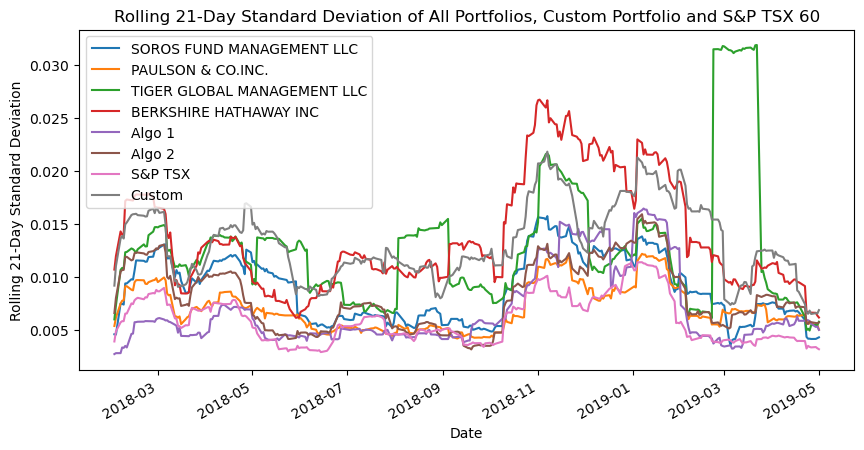

In [44]:
# Plot rolling standard deviation
portfolio_rolling_std_df.plot(ylabel = "Rolling 21-Day Standard Deviation", figsize = (10, 5), 
                              title = "Rolling 21-Day Standard Deviation of All Portfolios and S&P TSX 60")

### Calculate and plot the correlation

In [45]:
# Calculate and plot the correlation

# Calculate the correlation
portfolio_correlation_df = combined_portfolio_returns_df.corr()

# Display the correlation matrix
portfolio_correlation_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.615382
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.605615
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.445187
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.564670
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.178334
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.648624
S&P TSX,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.565204
Custom,0.615382,0.605615,0.445187,0.564670,0.178334,0.648624,0.565204,1.000000


<Axes: >

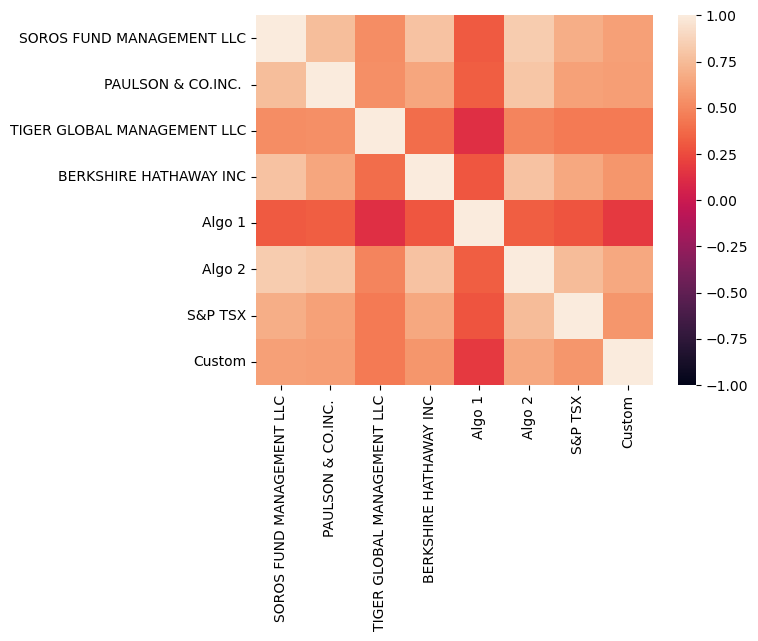

In [46]:
# Plot the correlation using the heatmap function
sns.heatmap(portfolio_correlation_df, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<Axes: title={'center': 'Rolling 60-Day Beta of the Custom Portfolio vs the S&P TSX 60'}, xlabel='Date', ylabel='Rolling 60-Day Beta'>

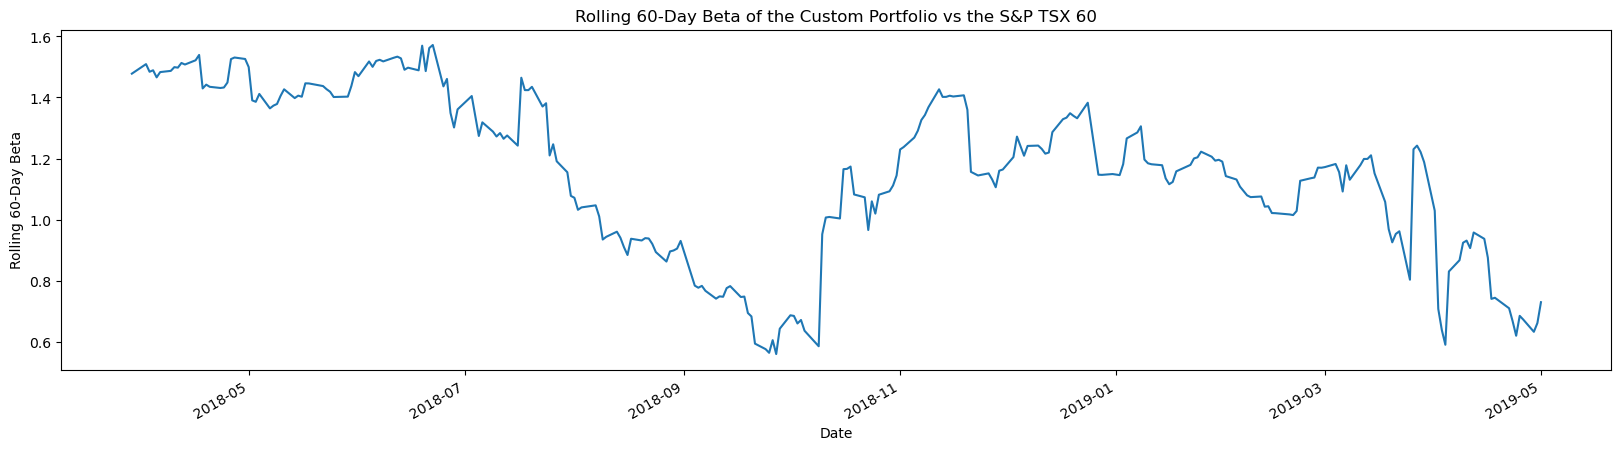

In [47]:
# Calculate and plot Beta
window = 60

# Calculate 60-day rolling covariance of daily returns of Custom Portfolio vs. S&P TSX
portfolio_rolling_covariance = combined_portfolio_returns_df['Custom'].rolling(window).cov(
    combined_portfolio_returns_df['S&P TSX'])

# Calculate 60-day rolling variance of S&P TSX
portfolio_rolling_variance = combined_portfolio_returns_df['S&P TSX'].rolling(window).var()

# Computing 60-day rolling beta
portfolio_rolling_beta = portfolio_rolling_covariance / portfolio_rolling_variance

# Plot 60-day rolling beta trend
portfolio_rolling_beta.plot(ylabel = "Rolling 60-Day Beta", figsize = (20, 5), 
                            title='Rolling 60-Day Beta of the Custom Portfolio vs the S&P TSX 60')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [48]:
# Calculate Annualized Sharpe Ratios
portfolio_sharpe_df = (combined_portfolio_returns_df.mean() * 252) / (combined_portfolio_returns_df.std() * np.sqrt(252))
portfolio_sharpe_df

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX                        0.034651
Custom                         0.928490
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}, ylabel='Annualized Sharpe Ratios'>

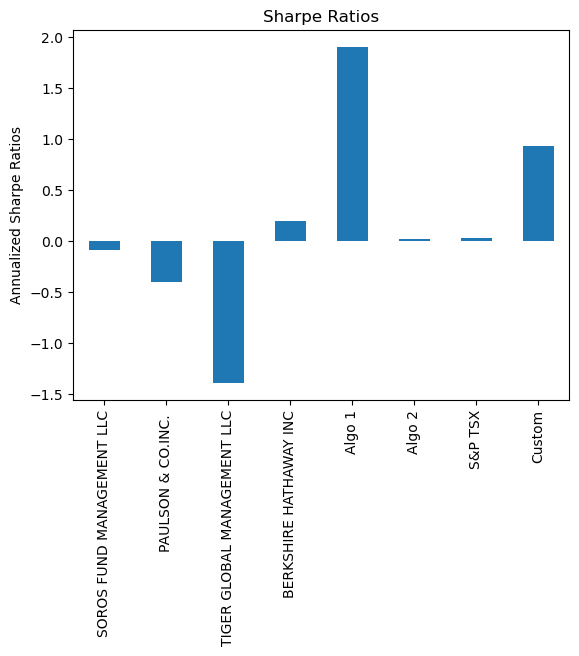

In [49]:
# Visualize the sharpe ratios as a bar plot
portfolio_sharpe_df.plot(ylabel = "Annualized Sharpe Ratios", kind = "bar", title = "Sharpe Ratios")

### How does your portfolio do?

By comparing the annualized standard deviation of my portfolio with the other portfolios, it follows that my portfolio is one of the riskiest being third with a standard deviation that is similar to the top two riskiest portfolios. This is also evident in the Rolling 21-Day Standard Deviation plot where the line for my portfolio trends higher compared to the others.

Looking at the correlation table and heatmap, my portfolio somewhat mimicks the **Algorithmic 2** portfolio, followed by the **SOROS FUND MANAGEMENT LLC** and **PAULSON & CO.INC.** portfolios. Thus, there does not seem to be a strong correlation with my portfolio to any of the others.

The plot of the 60-day rolling beta for my portfolio shows that it is generally more volitile than the market with a beta value greater than one for the majority of the year.

Lastly, by comparing the annualized sharpe ratios, my portfolio outperform all portfolios but the **Algorithmic 1** portfolio. This implies that my portfolio has a good return-to-risk ratio, outperforming even the S&P TSX 60.

# Contributor
Andy Vu